<a href="https://colab.research.google.com/github/KeGuo627/Telecom-Customer-Churn-Prediction/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn Prediction

Customer churn, also called customer attrition and customer turnover, is a key factor that lots of service provided company focus on because the cost loss of retaining an existing customer is far lower than exployering a new one. In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention.


# Contents


Part 0:    Load Data

Part 1:    Data Exploratory

Part 2:    Feature Preproccessing

Part 3:    Feature Selection

Part 4:    Model Training

Part 5:    Model Evaluation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 0: Load Data


In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1N3v0VWMW2tfJtT8dcdD5jOd_0lFSnjG9"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('Telecom_Customer_Churn') #Save content of this file as a local file.`

In [ ]:
churn_df = pd.read_csv('Telecom_Customer_Churn')#must be same as the GetContentFile()
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Part 1: Data Exploratory

### Part 1.1: Data Overview

In [ ]:
print('Row:', churn_df.shape[0])
print('Col:', churn_df.shape[1])

Row: 7043
Col: 21


In [ ]:
churn_df[churn_df.isnull().any(axis=1)].head()
print(churn_df.isnull().sum())
#no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
len(churn_df[churn_df['TotalCharges'] == " "])
#because the type of totalcharges is string

11

In [ ]:
## Drop missing data
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
churn_df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
y=churn_df['Churn']
print(y)

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object


In [ ]:
#check propotion of y=1
sum_of_churn = 0
for each in y:
  if each == 'Yes':
    sum_of_churn += 1
print(sum_of_churn/y.shape[0]*100)

26.578498293515356


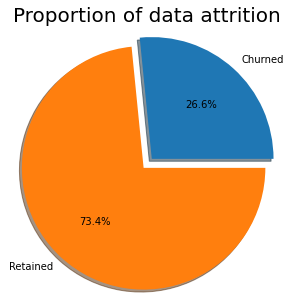

In [ ]:
#piechart for the proopotion of customer churn
labels = 'Churned', 'Retained'
sizes = [churn_df.Churn[churn_df['Churn']=='Yes'].count(), churn_df.Churn[churn_df['Churn']=='No'].count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=[5,5])
ax.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True)
ax.axis('equal')
plt.title("Proportion of data attrition",size=20)
plt.show()

customer churn datasets, where the vast majority of customers stay with the service (the “No-Churn” class) and a small minority cancel their subscription (the “Churn” class).

In [ ]:
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


### Part 1.2: Exploratory Data Analysis

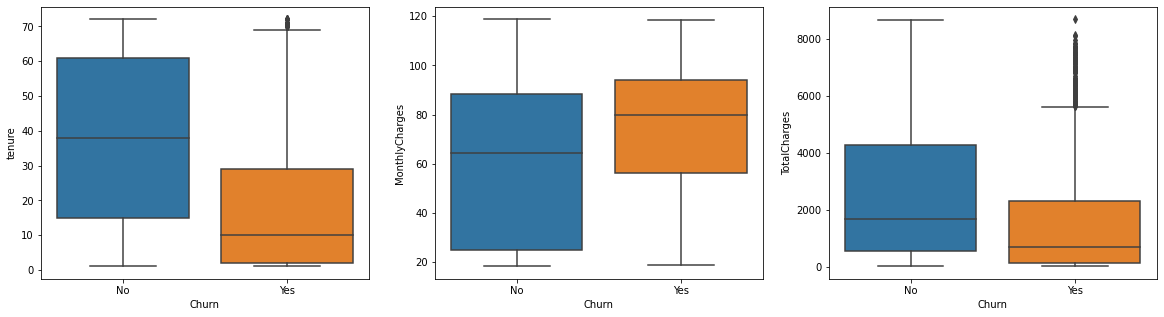

In [ ]:
#Looking the data distribution
#boxplot,distplot,countplot
#boxplot for numerical feature
_,axss = plt.subplots(1,3,figsize=[20,5])
sns.boxplot(x='Churn', y='tenure', data=churn_df, ax=axss[0])
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_df, ax=axss[1])
#For a column that contains both numeric and non-numeric values
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'],errors='coerce')
sns.boxplot(x='Churn', y='TotalCharges', data=churn_df, ax=axss[2])

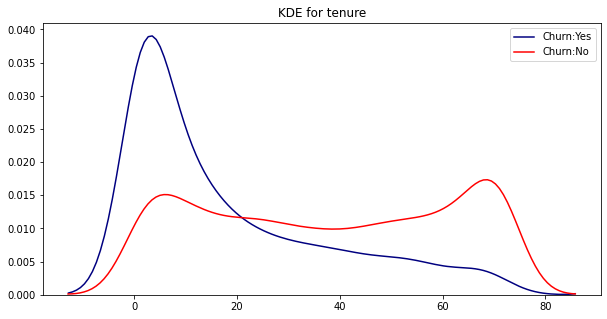

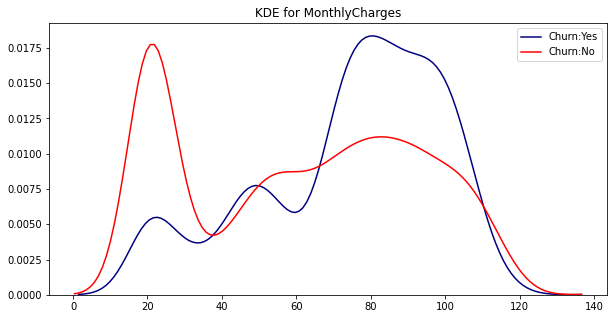

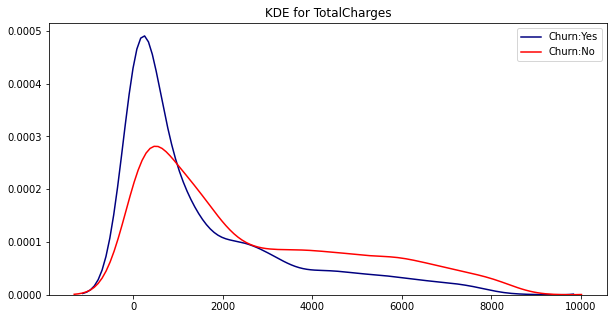

In [ ]:
#kde plot estimate the Probability Density of a continuous variable.(univariant or bivariant)
def kdeplot(feature):
  plt.figure(figsize=[10,5])
  ax0=sns.kdeplot(churn_df[churn_df["Churn"]=="Yes"][feature].dropna(),color='navy',label="Churn:Yes")
  ax1=sns.kdeplot(churn_df[churn_df["Churn"]=="No"][feature].dropna(),color='red',label="Churn:No")
  plt.title("KDE for {}".format(feature))
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

1.tenure and monthlycharges is more likely affect the Churn.

2.low tenure tends to churn

3.higher monthlycharges have high probability leading to the Churn

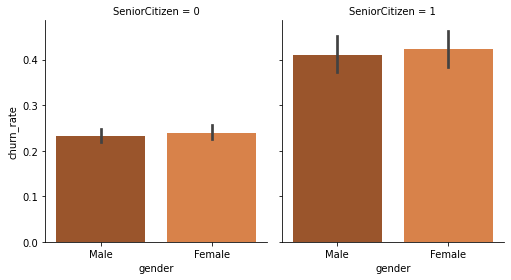

In [ ]:
churn_df["churn_rate"]=churn_df["Churn"].replace("No",0).replace("Yes",1)
g=sns.FacetGrid(churn_df, col="SeniorCitizen", height=4, aspect=.9)
ax=g.map(sns.barplot,"gender","churn_rate",palette = "Oranges_d", order= ['Male', 'Female'])

In [ ]:
#check propotion of Seniorcitizen
sum_of_sc = 0
for each in churn_df["SeniorCitizen"]:
  if each == 1:
    sum_of_sc += 1
print(1.0*sum_of_sc/churn_df["SeniorCitizen"].shape[0]*100)

16.24004550625711


1.gender is not a key attributor
2.Seniorcitizens are more likely to churn

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    #print(ratios)
    g = churn_df.groupby(feature)["Churn"].value_counts().to_frame()
    #print(g)
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    #print(g)
    g[axis_name] = g[axis_name]/len(churn_df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

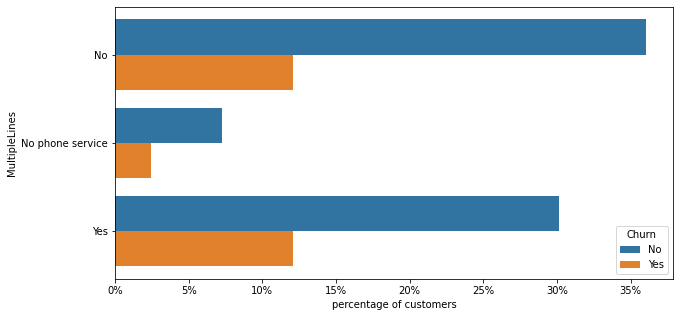

In [ ]:
#barplot for phone service
plt.figure(figsize=(10, 5))
barplot_percentages("MultipleLines", orient='h')

1.lots of customer have phone service

2.Customers with multiple lines have a slightly higher churn rate(ie.in the multiplelines group)

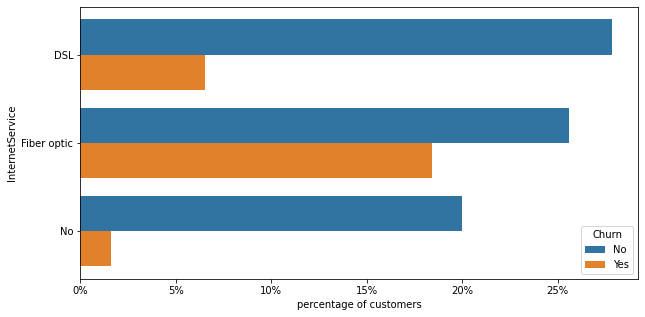

In [ ]:
#countplot for internet service
plt.figure(figsize=(10, 5))
barplot_percentages("InternetService", orient='h')

1.no internet service seems less churn

2.Customer with fiber optic have higher churn rate than with DSL.

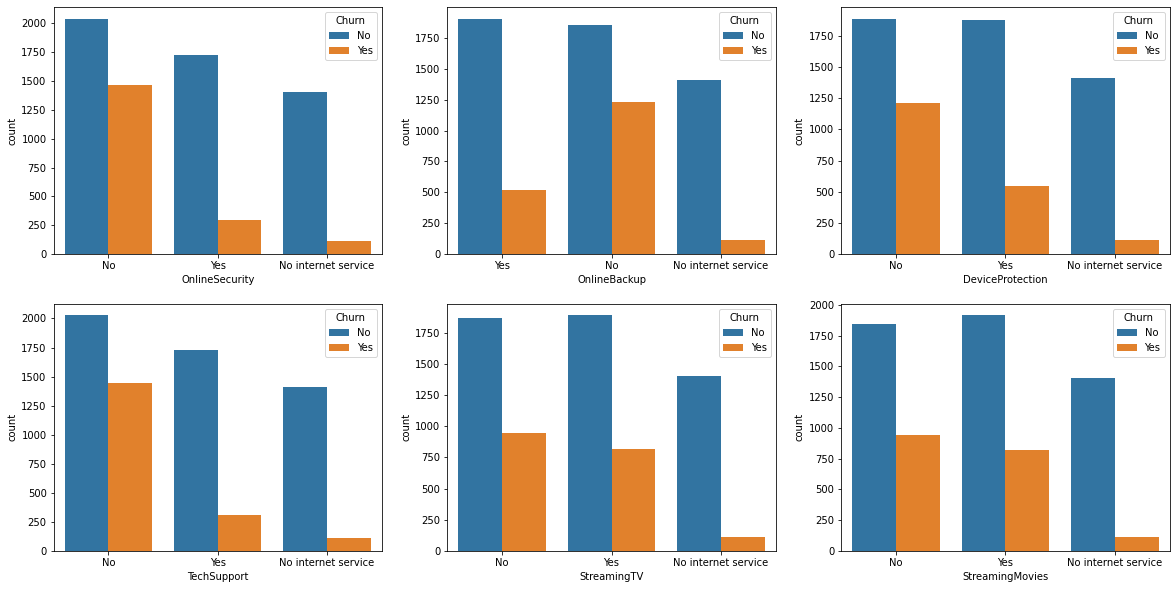

In [ ]:
#countplot for categorical feature(nine of them)
_,axss = plt.subplots(2,3,figsize=[20,10])
sns.countplot(x='OnlineSecurity',hue='Churn',data=churn_df,ax=axss[0][0])
sns.countplot(x='OnlineBackup',hue='Churn',data=churn_df,ax=axss[0][1])
sns.countplot(x='DeviceProtection',hue='Churn',data=churn_df,ax=axss[0][2])
sns.countplot(x='TechSupport',hue='Churn',data=churn_df,ax=axss[1][0])
sns.countplot(x='StreamingTV',hue='Churn',data=churn_df,ax=axss[1][1])
sns.countplot(x='StreamingMovies',hue='Churn',data=churn_df,ax=axss[1][2])

1.StreamingTV, StreamingMovies have less impact to customer churn

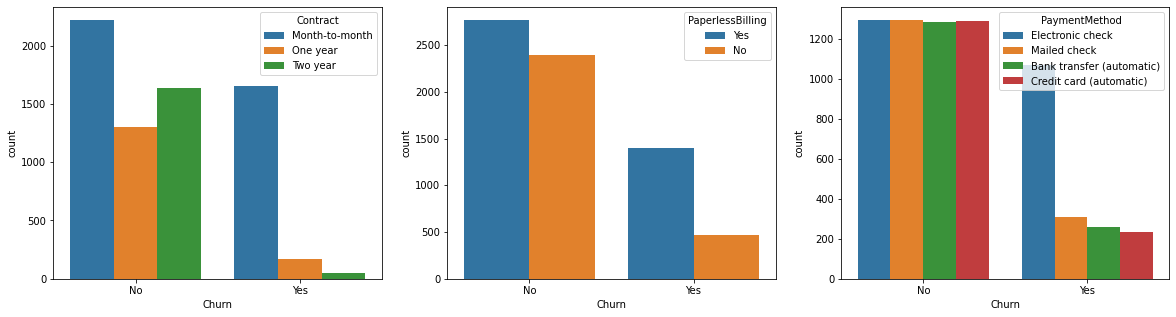

In [ ]:
#countplot for categorical feature(three of them)
_,axss = plt.subplots(1,3,figsize=[20,5])
sns.countplot(x='Churn',hue='Contract',data=churn_df,ax=axss[0])
sns.countplot(x='Churn',hue='PaperlessBilling',data=churn_df,ax=axss[1])
sns.countplot(x='Churn',hue='PaymentMethod',data=churn_df,ax=axss[2])

1.month-to-month contract (short term contract)are more likely to attrition

2.customer with paperlessbilling are preferably attrition

3.customer with Electronic check have more possible to tendover.

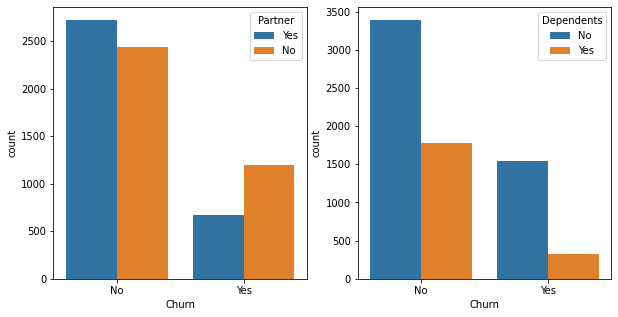

In [ ]:
_,axss = plt.subplots(1,2,figsize=[10,5])
sns.countplot(x='Churn',hue='Partner',data=churn_df,ax=axss[0])
sns.countplot(x='Churn',hue='Dependents',data=churn_df,ax=axss[1])

1.customers have partner are less likely to tendover

2.customers have dependents are less likely to tendover

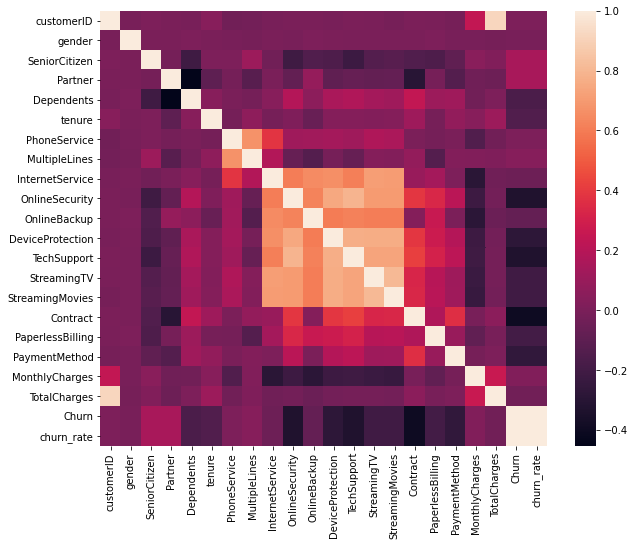

In [ ]:
#correlations between feature
plt.figure(figsize=(10, 8))
feature_df=churn_df
corr_score = feature_df.apply(lambda x: pd.factorize(x)[0]).corr()
# show heapmap of correlations
sns.heatmap(corr_score,xticklabels=corr_score.columns,yticklabels=corr_score.columns)

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Part 3: Feature Preprocessing

Feature encoding, drop some obviously unrelated feature

In [ ]:
#ordinal encoding
churn_df['gender']=churn_df['gender']=='Female'
print(churn_df['gender'])

0        True
1       False
2       False
3       False
4        True
        ...  
7038    False
7039     True
7040     True
7041    False
7042    False
Name: gender, Length: 7032, dtype: bool


In [ ]:
churn_df['gender'] = churn_df['gender'].map(lambda s :1  if s =='True' else 0)
churn_df['Partner'] = churn_df['Partner'].map(lambda s :1  if s =='Yes' else 0)
churn_df['Dependents'] = churn_df['Dependents'].map(lambda s :1  if s =='Yes' else 0)
churn_df['PhoneService'] = churn_df['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
churn_df['PaperlessBilling'] = churn_df['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [ ]:
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,0,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,Yes,1
6,1452-KIOVK,0,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,No,0
7,6713-OKOMC,0,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,No,0
8,7892-POOKP,0,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,Yes,1
9,6388-TABGU,0,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,No,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [ ]:
# one hot encoding
# onehotencoder
churn_df = pd.get_dummies(churn_df, columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
#Multiplelines(phone severice already exist)
churn_df['MultipleLines'].replace('No phone service','No', inplace=True)
churn_df['MultipleLines'] = churn_df['MultipleLines'].map(lambda x :1  if x =='Yes' else 0)
#OnlineSecurity,onlinebackup.deviceprotection,techsupport,streamingtv,streamingmovies
churn_df['OnlineSecurity'] = churn_df['OnlineSecurity'].map(lambda x :1  if x =='Yes' else 0)
churn_df['OnlineBackup'] = churn_df['OnlineBackup'].map(lambda x :1  if x =='Yes' else 0)
churn_df['DeviceProtection'] = churn_df['DeviceProtection'].map(lambda x :1  if x =='Yes' else 0)
churn_df['TechSupport'] = churn_df['TechSupport'].map(lambda x :1  if x =='Yes' else 0)
churn_df['StreamingTV'] = churn_df['StreamingTV'].map(lambda x :1  if x =='Yes' else 0)
churn_df['StreamingMovies'] = churn_df['StreamingMovies'].map(lambda x :1  if x =='Yes' else 0)

In [ ]:
churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,churn_rate,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,No,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,No,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,Yes,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,No,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,Yes,1,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,Yes,1,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,0,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,No,0,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,No,0,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,Yes,1,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,0,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,No,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

In [ ]:
X = churn_df.drop(['customerID','Churn','churn_rate'], axis=1)

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0


In [ ]:
X['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'],errors='coerce')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [ ]:
y= churn_df['Churn'].map(lambda s :1  if s =='Yes' else 0)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Part 3:    Model Training

### Part 3.1: Split dataset

In [ ]:
# Splite data into training and testing
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=101)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 5274 observation with 26 features
test data has 1758 observation with 26 features


In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 1321 to 4592
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5274 non-null   int64  
 1   SeniorCitizen                            5274 non-null   int64  
 2   Partner                                  5274 non-null   int64  
 3   Dependents                               5274 non-null   int64  
 4   tenure                                   5274 non-null   int64  
 5   PhoneService                             5274 non-null   int64  
 6   MultipleLines                            5274 non-null   int64  
 7   OnlineSecurity                           5274 non-null   int64  
 8   OnlineBackup                             5274 non-null   int64  
 9   DeviceProtection                         5274 non-null   int64  
 10  TechSupport                              5274

In [ ]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import Normalizer
Normalized = Normalizer().fit(X_train)
Normalized.transform(X_train)
Normalized.transform(X_test)

array([[0.        , 0.        , 0.00213815, ..., 0.        , 0.00213815,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01868897, 0.        , ..., 0.        , 0.        ,
        0.01868897],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00151298],
       [0.        , 0.00045548, 0.        , ..., 0.00045548, 0.        ,
        0.        ]])

### Part 3.2: Model Training and Selection

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8094425483503982

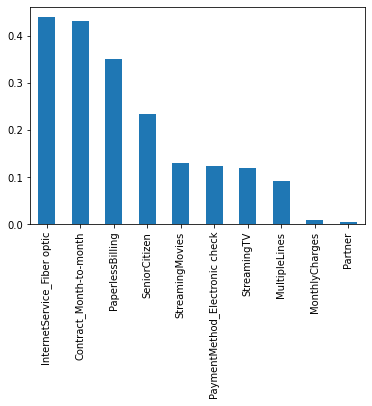

In [ ]:
# To get the weights of all the variables
weight = pd.Series(classifier_logistic.coef_[0],index=X.columns.values)
weight.sort_values(ascending=False)[:10].plot.bar()

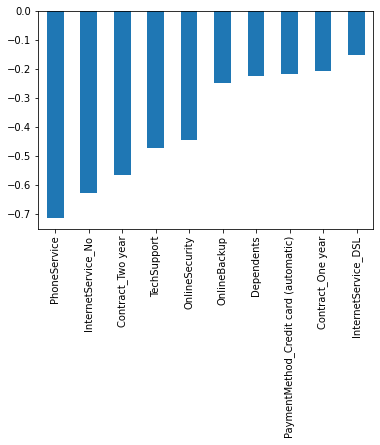

In [ ]:
weight.sort_values(ascending=True)[:10].plot.bar()

1.total charges have a huge impact to customer churn

2.tenure is negative related to the churn

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier 
# Train the model
classifier_knn=KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
classifier_knn.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
classifier_knn.score(X_test,y_test)

0.7622298065984073

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

classifier_rf = RandomForestClassifier(max_leaf_nodes=30,random_state=50)
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
classifier_rf.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
classifier_rf.score(X_test,y_test)

0.8077360637087599

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_knn, classifier_rf]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.80758294 0.81895735 0.77251185 0.8056872  0.80265655]
Model accuracy of Logistic Regression is 0.8014791765964908
[0.76018957 0.78578199 0.75829384 0.76398104 0.77514231]
Model accuracy of KNN is 0.7686777520976286
[0.80947867 0.80947867 0.78199052 0.79810427 0.79316888]
Model accuracy of Random Forest is 0.7984442026313661


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty term: L1 or L2
# C=1/lambda
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10) 
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_LR)

Best score: 0.803943991294729
Best parameters set:
C:1
penalty:l2


In [ ]:
# best model
best_LR = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters - KNN

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.7817597597057475
Best parameters set:
n_neighbors:9


In [ ]:
# best model
best_KNN = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [500,1000],
    'max_depth': range(1,5,2),
    'max_features' : ('log2', 'sqrt'),
    'class_weight':[{1: w} for w in [1,1.5]]
}
Grid_RF = GridSearchCV(RandomForestClassifier(random_state=15),parameters, cv=15)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=15,
                                 

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.7995829016662351
Best parameters set:
class_weight:{1: 1.5}
max_depth:3
max_features:sqrt
n_estimators:1000


In [ ]:
# best model
best_RF = Grid_RF.best_estimator_

Logistics regression, Random Forest, KNN

LR and RF are better than KNN

# Part 4:    Model Evaluation

### Part 4.1: Confusion Matrix (Precision, Recall, Accuracy)

class of interest is the churn(=1)

Precision: tp / (tp + fp)
Recall: tp / (tp + fn)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#       predicted class
#cm=      P       N
#    P    TP     FN
#    N    FP     TN
# actual class
# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
    #return cm

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN.predict(X_test)))]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.7992036405005688
precision is: 0.6484375
recall is: 0.5331905781584583

Logistic Regression
Accuracy is: 0.8071672354948806
precision is: 0.6828571428571428
recall is: 0.5117773019271948

K nearest neighbor
Accuracy is: 0.7713310580204779
precision is: 0.5987841945288754
recall is: 0.42184154175588867



### Part 4.2: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 4.2.1: ROC of RF Model

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)

In [ ]:
best_RF.predict_proba(X_test)

array([[0.34623015, 0.65376985],
       [0.94606723, 0.05393277],
       [0.56989379, 0.43010621],
       ...,
       [0.51101494, 0.48898506],
       [0.67165222, 0.32834778],
       [0.53674281, 0.46325719]])

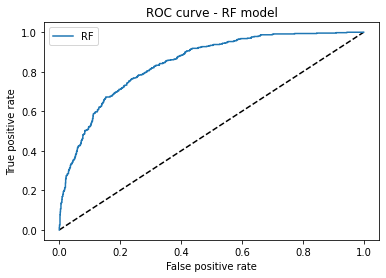

In [ ]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8439252475961897

#### Part 4.2.2: ROC of KNN Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_knn = best_KNN.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

In [ ]:
best_KNN.predict_proba(X_test)

array([[0.11111111, 0.88888889],
       [1.        , 0.        ],
       [0.77777778, 0.22222222],
       ...,
       [0.77777778, 0.22222222],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])

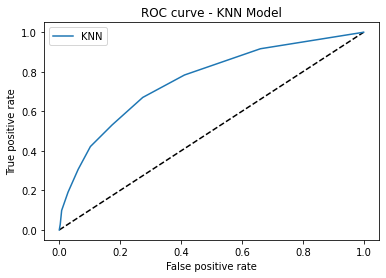

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.7575406744435617

#### Part 4.2.3: ROC of LR Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR.predict_proba(X_test)

array([[0.27897077, 0.72102923],
       [0.99586135, 0.00413865],
       [0.69699333, 0.30300667],
       ...,
       [0.53124116, 0.46875884],
       [0.81706849, 0.18293151],
       [0.58533046, 0.41466954]])

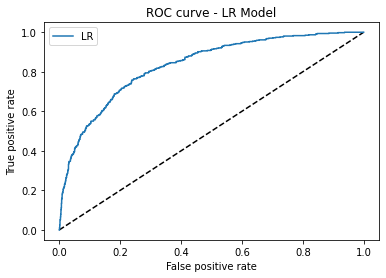

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8330145945327311

AUC of Random Forest model is the highest, which means after tunning the hyperparameter, RF classifier has the best performance.

# Part 5: Feature Selection

### Part 5.1:  Random Forest Model - Feature Importance Discussion

In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
TotalCharges : 0.1968
MonthlyCharges : 0.1819
tenure : 0.1626
Contract_Month-to-month : 0.0678
InternetService_Fiber optic : 0.036
PaymentMethod_Electronic check : 0.0326
PaperlessBilling : 0.0264
Partner : 0.0249
SeniorCitizen : 0.0215
OnlineBackup : 0.0215
OnlineSecurity : 0.0207
Contract_Two year : 0.0207
TechSupport : 0.0205
Dependents : 0.0196
MultipleLines : 0.0194
DeviceProtection : 0.019
StreamingMovies : 0.0177
StreamingTV : 0.0164
PaymentMethod_Credit card (automatic) : 0.0124
InternetService_No : 0.0119
PaymentMethod_Bank transfer (automatic) : 0.0116
PaymentMethod_Mailed check : 0.0114
Contract_One year : 0.0107
InternetService_DSL : 0.0097
PhoneService : 0.0064
gender : 0.0


Obviously, TotalCharges, MonthlyCharges and tenure are the three most important feature.

### Part 5.2:  Logistic Regression Model - Feature Selection Discussion 

In [ ]:
# add L1 regularization to logistic regression
# check the coef for feature selection

from sklearn.preprocessing import StandardScaler
X_with_corr = X.copy()
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.07, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
tenure : -0.8971
InternetService_Fiber optic : 0.425
Contract_Month-to-month : 0.3346
InternetService_No : -0.3082
Contract_Two year : -0.2298
PaymentMethod_Electronic check : 0.1585
PaperlessBilling : 0.1566
OnlineSecurity : -0.1537
TechSupport : -0.1412
PhoneService : -0.1268
MultipleLines : 0.1199
StreamingMovies : 0.1162
StreamingTV : 0.11
TotalCharges : 0.1062
SeniorCitizen : 0.0752
Dependents : -0.0635
OnlineBackup : -0.0424
PaymentMethod_Credit card (automatic) : -0.0155
Partner : 0.0
PaymentMethod_Mailed check : 0.0
DeviceProtection : 0.0
MonthlyCharges : 0.0
InternetService_DSL : 0.0
Contract_One year : 0.0
PaymentMethod_Bank transfer (automatic) : 0.0
gender : 0.0


The absolute L1 coefficitent of each feature is higher, that has greater impact to the y(label:churn)

Thus, tenure, InternetService_Fiber and Contract_Month-to-month have more importance than the others(Some has positive impact, the other has negative impact)

In [ ]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
tenure : -1.1108
TotalCharges : 0.3621
InternetService_No : -0.3262
InternetService_Fiber optic : 0.315
Contract_Two year : -0.3
Contract_Month-to-month : 0.2884
OnlineSecurity : -0.1794
PhoneService : -0.1773
TechSupport : -0.1684
PaperlessBilling : 0.1648
MultipleLines : 0.1198
PaymentMethod_Electronic check : 0.1167
StreamingMovies : 0.098
StreamingTV : 0.0934
MonthlyCharges : 0.0843
SeniorCitizen : 0.0788
OnlineBackup : -0.0788
Dependents : -0.0698
PaymentMethod_Credit card (automatic) : -0.0635
InternetService_DSL : -0.0465
PaymentMethod_Mailed check : -0.0409
Contract_One year : -0.0378
PaymentMethod_Bank transfer (automatic) : -0.0286
DeviceProtection : -0.0231
Partner : -0.0045
gender : 0.0


When the L2 coefficients of two feature are numerically close, we assume they are highly-corrlated.

For example, streamingMovies and the streamingTV are corrlated.